# Example Dataset Inference - for activation

In [4]:
import pandas as pd

general_df = pd.read_csv('dataset/example/index.csv', delimiter=',')

# Splitting the 'tags' column into a list of tags
general_df['tags'] = general_df['tags'].apply(lambda x: x.split(';'))

# Function to find all images containing a specific tag
def find_images_with_tag(tag):
    return general_df[general_df['tags'].apply(lambda x: tag in x)]['path'].tolist()

# Example: find all images with the tag 'black'
images_with_black = find_images_with_tag('black')
images_with_black

['img/zebra.png',
 'img/perforated.png',
 'img/grid.png',
 'img/lacelike.png',
 'img/crosshatched.png',
 'img/chequered.png',
 'img/dotted.png']

In [1]:
from feature_operation import hook_feature,FeatureOperator

fo = FeatureOperator()
print(fo.data.label)

[{'number': 0, 'name': '', 'category': {}, 'frequency': 0, 'coverage': 0.0, 'syns': []}, {'number': 1, 'name': 'black-c', 'category': {'color': 62358}, 'frequency': 62358, 'coverage': 11135.320474, 'syns': ['']}, {'number': 2, 'name': 'grey-c', 'category': {'color': 62310}, 'frequency': 62310, 'coverage': 12712.843129, 'syns': ['']}, {'number': 3, 'name': 'white-c', 'category': {'color': 62054}, 'frequency': 62054, 'coverage': 5778.038204, 'syns': ['']}, {'number': 4, 'name': 'brown-c', 'category': {'color': 61583}, 'frequency': 61583, 'coverage': 14549.652454, 'syns': ['']}, {'number': 5, 'name': 'green-c', 'category': {'color': 61508}, 'frequency': 61508, 'coverage': 5049.989735, 'syns': ['']}, {'number': 6, 'name': 'pink-c', 'category': {'color': 60755}, 'frequency': 60755, 'coverage': 1478.518582, 'syns': ['']}, {'number': 7, 'name': 'purple-c', 'category': {'color': 59516}, 'frequency': 59516, 'coverage': 865.041519, 'syns': ['']}, {'number': 8, 'name': 'blue-c', 'category': {'col

# HTML Report Double Check

pascal/2010_000468.jpg


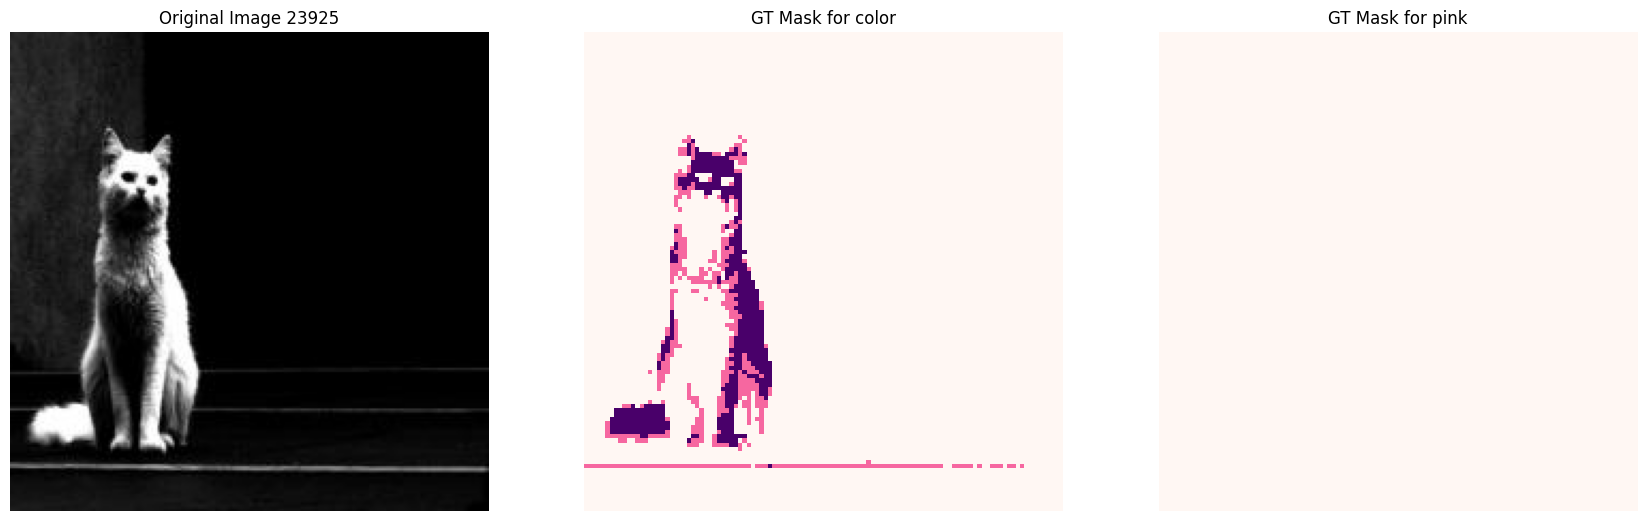

In [4]:
from loader.data_loader import SegmentationData
import settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import imageio

data_loader = SegmentationData(settings.DATA_DIRECTORY, categories=settings.CATAGORIES)

index = 23925  
category = 'color'  
label_name = 'pink'

from PIL import Image
df = pd.read_csv('dataset/broden1_224/'+ settings.INDEX_FILE)

img_path = df['image'][index]
print(img_path)
image_tensor = imageio.v2.imread(data_loader.filename(index))
img = Image.open('./dataset/broden1_224/images/'+ data_loader.image[index]['image'])

def get_code_by_label_name(ds, category, label_name):
    for label_info in ds.category_label[category]:
        if label_info['name'] == label_name:
            return label_info['code']
    return None

label_code = get_code_by_label_name(ds=data_loader, category=category, label_name = label_name)

# 获取 ground truth mask
gt_mask = data_loader.segmentation_data(category=category,i=index)


gt_mask_singel_label = np.where(gt_mask == label_code, 1, 0) # binary mask
gt_mask_singel_label = resize(gt_mask_singel_label, image_tensor.shape[:2], order=1, mode='reflect')


unique_labels = np.unique(gt_mask)  # 获取所有唯一的标签值


# for label in unique_labels:
#     label_name = next((item['name'] for item in data_loader.category_label[category] if item['code'] == label), None)
#     print(f"Label Code: {label}, Label Name: {label_name}")


# 创建一个图形和三个子图
fig, axs = plt.subplots(1, 3, figsize=(21, 7))  # 1行3列的子图

# 显示原始图像
axs[0].imshow(img)
axs[0].set_title(f'Original Image {index}')
axs[0].axis('off')  # 关闭坐标轴

# 显示原始的 Ground Truth Mask
axs[1].imshow(gt_mask, cmap='RdPu')
axs[1].set_title(f'GT Mask for {category}')
axs[1].axis('off')

# 显示只有单个标签的 Ground Truth Mask
axs[2].imshow(gt_mask_singel_label, cmap='RdPu')
axs[2].set_title(f'GT Mask for {label_name}')
axs[2].axis('off')

plt.show()


In [24]:
for cat in data_loader.category_label[category]:
    print(f"Label Code: {cat['code']}, Label Name: {cat['name']}")

Label Code: 0, Label Name: 
Label Code: 1, Label Name: wall
Label Code: 2, Label Name: sky
Label Code: 3, Label Name: floor
Label Code: 4, Label Name: tree
Label Code: 5, Label Name: building
Label Code: 6, Label Name: person
Label Code: 7, Label Name: ceiling
Label Code: 8, Label Name: table
Label Code: 9, Label Name: windowpane
Label Code: 10, Label Name: road
Label Code: 11, Label Name: grass
Label Code: 12, Label Name: chair
Label Code: 13, Label Name: car
Label Code: 14, Label Name: plant
Label Code: 15, Label Name: painting
Label Code: 16, Label Name: door
Label Code: 17, Label Name: sidewalk
Label Code: 18, Label Name: light
Label Code: 19, Label Name: cabinet
Label Code: 20, Label Name: signboard
Label Code: 21, Label Name: lamp
Label Code: 22, Label Name: ground
Label Code: 23, Label Name: curtain
Label Code: 24, Label Name: pole
Label Code: 25, Label Name: mountain
Label Code: 26, Label Name: fence
Label Code: 27, Label Name: streetlight
Label Code: 28, Label Name: bed
Label 

# Concept Level with Layer Level

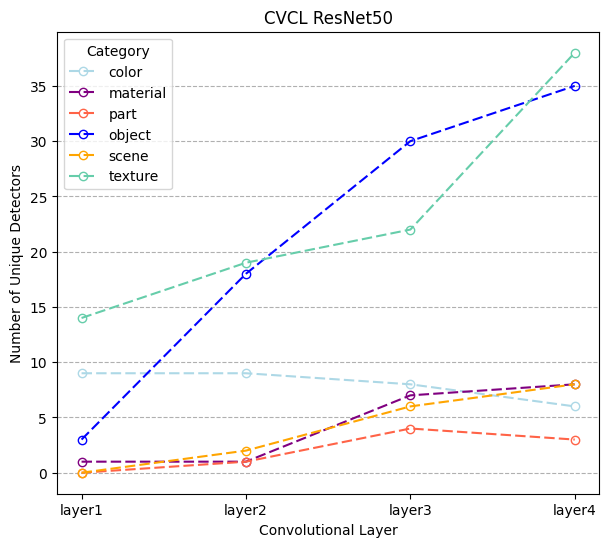

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 根据实际的层数进行调整
num_layers = 4  
layers = [f"result/cvcl_c6_l4_1/tally_{i}.csv" for i in range(num_layers)]

# 初始化每层的类别计数字典
category_counts = {f'layer{i+1}': {} for i in range(num_layers)}

# 读取所有可能的类别
all_categories = set()
for i, layer in enumerate(layers):
    df = pd.read_csv(layer)
    all_categories.update(df['category'].unique())

# 根据类别初始化数据字典
plot_data = {category: [0] * num_layers for category in all_categories}

# 遍历每层的CSV文件
for i, layer in enumerate(layers):
    df = pd.read_csv(layer)
    
    # 统计每个类别的独特标签数量
    category_count = df.groupby('category')['label'].nunique()
    
    for category in all_categories:
        if category in category_count:
            plot_data[category][i] = category_count[category]

# 指定每个类别的颜色和线条风格
colors = {
    'object': 'blue',
    'part': 'tomato',
    'scene': '#FFA500',  # 橙黄色
    'material': 'purple',
    'texture': 'mediumaquamarine',  # 淡绿色
    'color': '#ADD8E6'  # 淡蓝色
}

# 绘图
plt.figure(figsize=(7, 6))
for category, data in plot_data.items():
    plt.plot([f'layer{i+1}' for i in range(num_layers)], data, marker='o',markerfacecolor='none', label=category, color=colors[category], linestyle='--', dashes=(5, 2))

plt.title('CVCL ResNet50')
plt.xlabel('Convolutional Layer')
plt.ylabel('Number of Unique Detectors')
plt.legend(title='Category')
plt.grid(True, linestyle='--', axis='y')
plt.show()